In [1]:
# 크롤링 및 추천시스템 위한 라이브러리 호출
import pandas as pd  
import numpy as np   

import requests
from bs4 import BeautifulSoup    
from selenium import webdriver   
from selenium.webdriver.common.keys import Keys
import chromedriver_autoinstaller 

import time    
import re
import math
from tqdm import tqdm_notebook

# 데이터분석 위한 라이브러리 호출

import nltk
from konlpy.tag import Okt

# 그래프
%matplotlib inline
import os
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz             
from sklearn.tree import export_graphviz

# matplotlib 그래프 한글폰트 깨질 때 대처(Mac & Window)
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/HMFMMUEX.ttc").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')
    
# 그래프에서 마이너스 기호가 표시되도록 하는 설정
matplotlib.rcParams['axes.unicode_minus'] = False

from collections import Counter

import warnings
warnings.filterwarnings('ignore')


## 카테고리별 리뷰 수

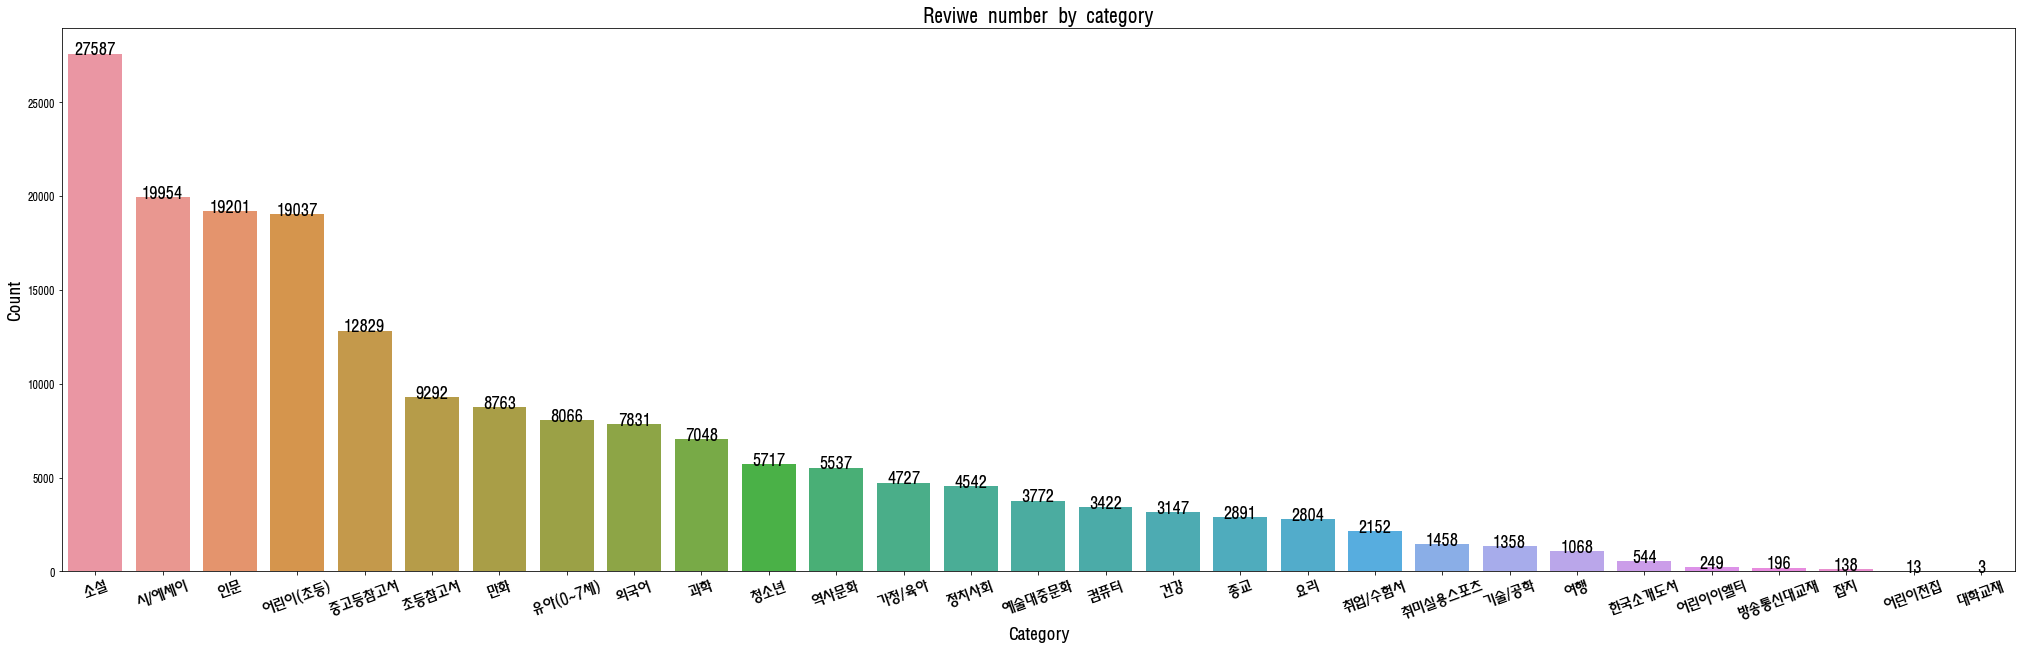

In [14]:
plt.figure(figsize=(35, 10))
bar=sns.barplot(data=gyobo_count,x='category',y='review_num')
bar.set_title('Reviwe number by category', fontsize=18)
bar.set_xlabel('Category', fontdict={'size':16})                  
bar.set_ylabel('Count', fontdict={'size':16}) 
for p in bar.patches: # annotation
    bar.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()-20), ha = 'center', size = 15)
plt.xticks(fontsize=15, rotation=20)
plt.show()

## 리뷰 수 순으로 도서 정렬

In [15]:
gyobo_total = gyobo_anal[['title','total']]
gyobo_total = gyobo_total.drop_duplicates()
gyobo_total = gyobo_total.sort_values('total',ascending=False).head(30)
gyobo_total.reset_index(drop=True,inplace=True)
gyobo_total

,title,total
0,나미야 잡화점의 기적(양장본 HardCover),1976
1,언어의 온도(170만부 기념 에디션),1913
2,여행의 이유,1586
3,설민석의 조선왕조실록,1491
4,아몬드(양장본 HardCover),1477
5,나는 나로 살기로 했다,1465
6,달러구트 꿈 백화점,1388
7,"곰돌이 푸, 행복한 일은 매일 있어",1318
8,사피엔스,1226
9,코스모스(보급판),1105


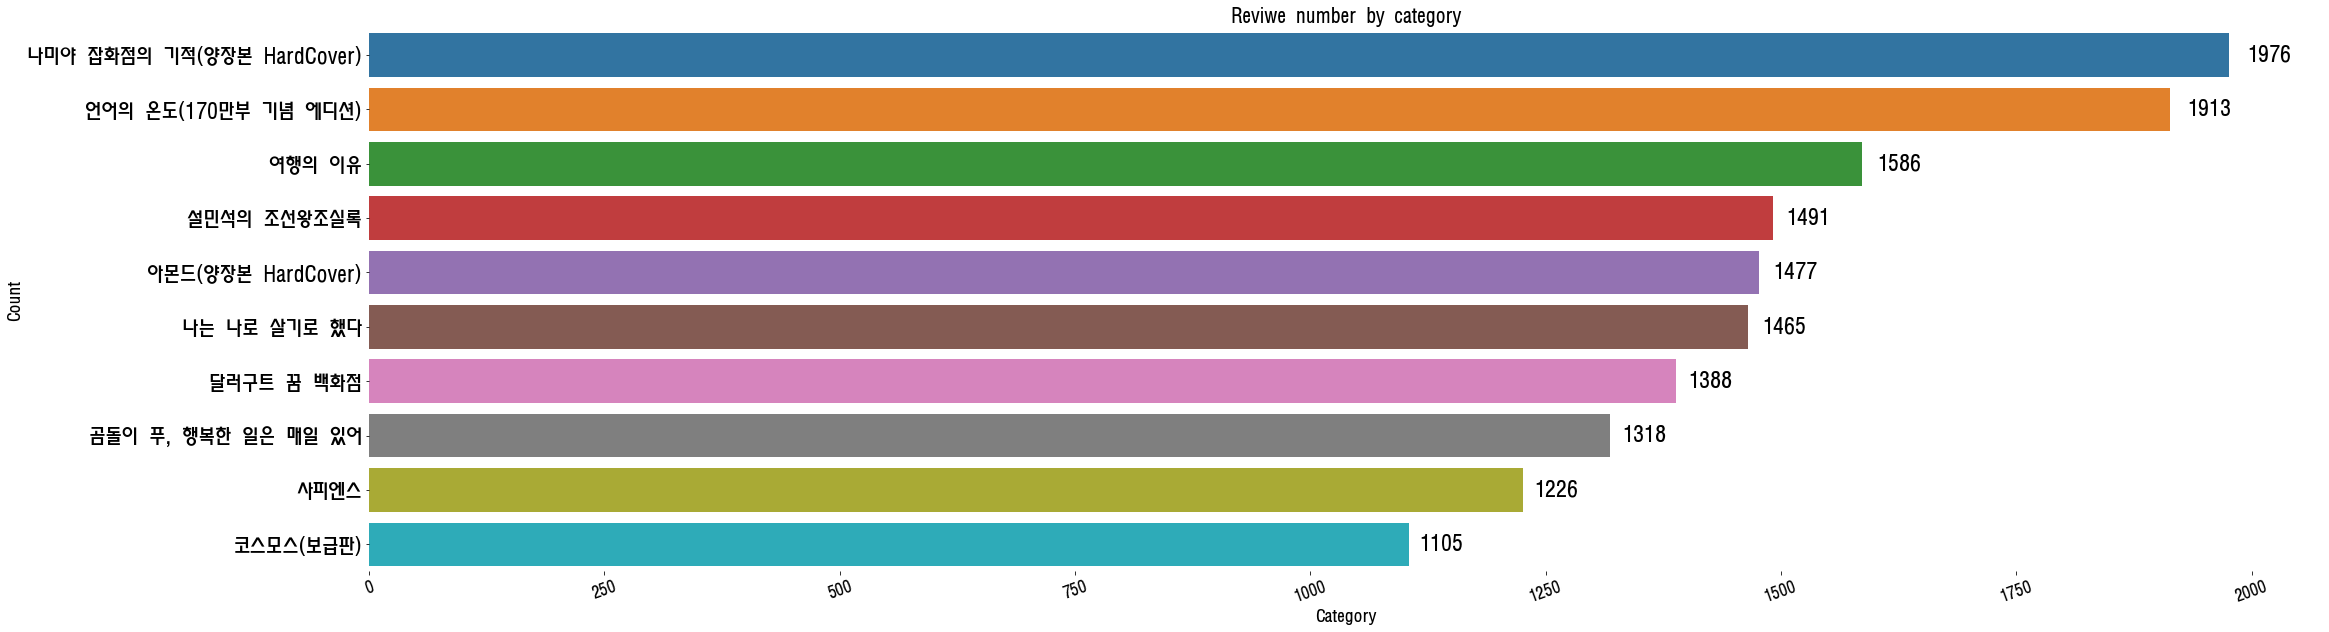

In [16]:
plt.figure(figsize=(35, 10))
bar=sns.barplot(data=gyobo_total.head(10),x='total',y='title')
bar.set_title('Reviwe number by category', fontsize=18)
bar.set_xlabel('Category', fontdict={'size':16})                  
bar.set_ylabel('Count', fontdict={'size':16}) 
for p in bar.patches:
    x, y, width, height = p.get_bbox().bounds
    bar.text(width*1.01, y+height/2, "%.0f"%(width), va='center',size=20)
plt.xticks(fontsize=15, rotation=20)
plt.yticks(fontsize=20)
plt.box(False)
plt.show()

## 카테고리별 키워드 분석

In [17]:
gyobo_kc.value_counts('category')

category
가정/육아       137
시/에세이       137
소설          133
요리          133
인문          132
어린이(초등)     132
외국어         132
청소년         129
종교          128
과학          128
유아(0~7세)    127
취업/수험서      126
역사문화        125
건강          125
취미실용스포츠     124
예술대중문화      124
만화          120
정치사회        120
여행          120
초등참고서       120
컴퓨터         119
중고등참고서      115
기술/공학       106
한국소개도서       93
방송통신대교재      67
잡지           13
어린이이엘티        1
dtype: int64

In [18]:
gyobo_novel =gyobo_kc[gyobo_kc['category']=='한국소개도서'] # 우측의 카테고리 이름 변경시 해당 데이터 확인이 가능하다.
keyword_list = gyobo_novel.keyword.values.tolist()

for i in range(len(keyword_list)):
    if type(keyword_list[i]) != str:
        keyword_list[i] = str(keyword_list[i])
        
        # 수집한 글들을 한 문장으로 합치기
keyword_text = ''

for each_line in keyword_list[:]:
    keyword_text = keyword_text + each_line
keyword_text = keyword_text.split(' ')

keyword_counter =Counter(keyword_text)
keyword_counter.most_common(100)

[('학습', 29),
 ('한국', 19),
 ('수업', 17),
 ('문법', 14),
 ('문화', 14),
 ('설계', 13),
 ('생활', 13),
 ('언어', 11),
 ('성인', 10),
 ('사회', 10),
 ('이민자', 10),
 ('능력', 6),
 ('문제', 6),
 ('한국어', 6),
 ('실전', 6),
 ('오늘', 5),
 ('날씨', 5),
 ('모범', 5),
 ('답안', 5),
 ('외국인', 5),
 ('이주해', 5),
 ('구어', 5),
 ('베트남어', 5),
 ('방법', 5),
 ('발음', 5),
 ('지도서', 5),
 ('유형', 5),
 ('비빔밥', 4),
 ('교재', 4),
 ('문어', 4),
 ('복습', 4),
 ('모의고사', 4),
 ('법무부', 4),
 ('대한민국', 3),
 ('한글', 3),
 ('항목', 3),
 ('취업', 3),
 ('어휘', 3),
 ('음식', 3),
 ('정보', 3),
 ('핵심', 3),
 ('러시아어', 3),
 ('태국어', 3),
 ('몽골어', 3),
 ('연습', 3),
 ('의사소통', 3),
 ('스마트폰', 3),
 ('무역', 3),
 ('회사', 3),
 ('필수', 3),
 ('상황', 2),
 ('규칙', 2),
 ('준비', 2),
 ('성격', 2),
 ('설날', 2),
 ('남북국', 2),
 ('시대', 2),
 ('의례', 2),
 ('강원', 2),
 ('연계', 2),
 ('단원', 2),
 ('명절', 2),
 ('종합', 2),
 ('주세요', 2),
 ('전화', 2),
 ('공부', 2),
 ('지문', 2),
 ('누리', 2),
 ('테니스', 2),
 ('관계', 2),
 ('가요', 2),
 ('담화', 2),
 ('유도', 2),
 ('교통사고', 2),
 ('일요일', 2),
 ('신입', 2),
 ('보조', 2),
 ('유학', 2),
 ('여가', 2),
 ('필리핀', 2),
 

In [19]:
# 불용어 : 인터넷 검색 시 검색 용어로 사용하지 않는 단어. 관사, 전치사, 조사, 접속사 등 검색 색인 단어로 의미가 없는 단어
stop_words = ['.',' ', '\n', 'nan','소설','한국','문학','작가','작품','집','에세이']

keyword_text = [word for word in keyword_text if not word in stop_words] #불용어 제거
keyword_counter = Counter(keyword_text)
rank=keyword_counter.most_common(15)
rank

[('학습', 29),
 ('수업', 17),
 ('문법', 14),
 ('문화', 14),
 ('설계', 13),
 ('생활', 13),
 ('언어', 11),
 ('성인', 10),
 ('사회', 10),
 ('이민자', 10),
 ('능력', 6),
 ('문제', 6),
 ('한국어', 6),
 ('실전', 6),
 ('오늘', 5)]

In [20]:
data = pd.DataFrame.from_dict(dict(rank),orient='index')

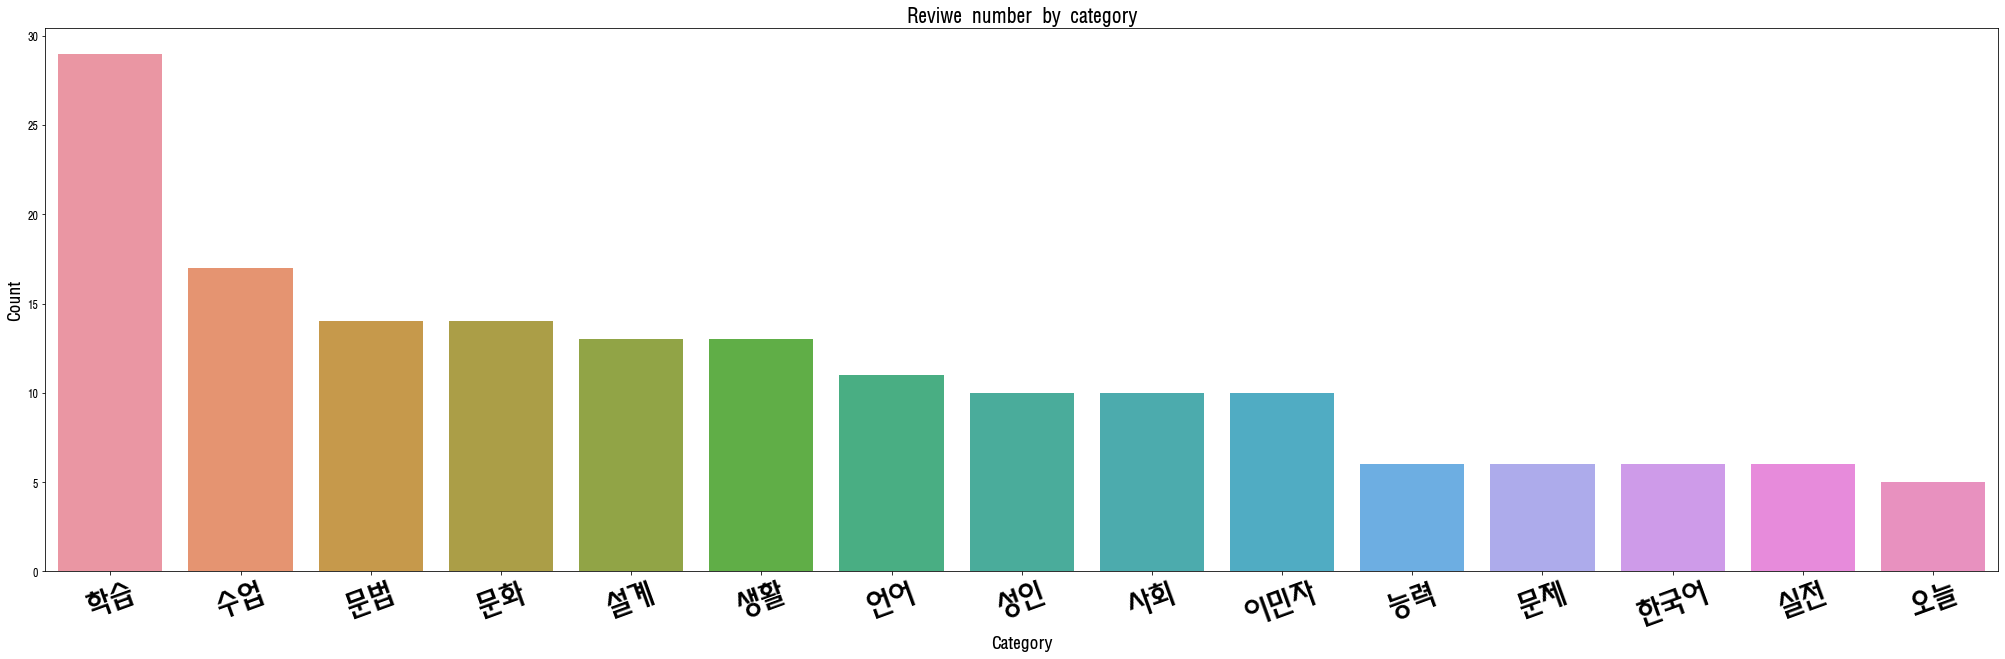

In [21]:
plt.figure(figsize=(35, 10))
bar=sns.barplot(data=data,x=data.index,y=data[0])
bar.set_title('Reviwe number by category', fontsize=18)
bar.set_xlabel('Category', fontdict={'size':16})                  
bar.set_ylabel('Count', fontdict={'size':16}) 

plt.xticks(fontsize=30, rotation=20)
plt.show()

In [22]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

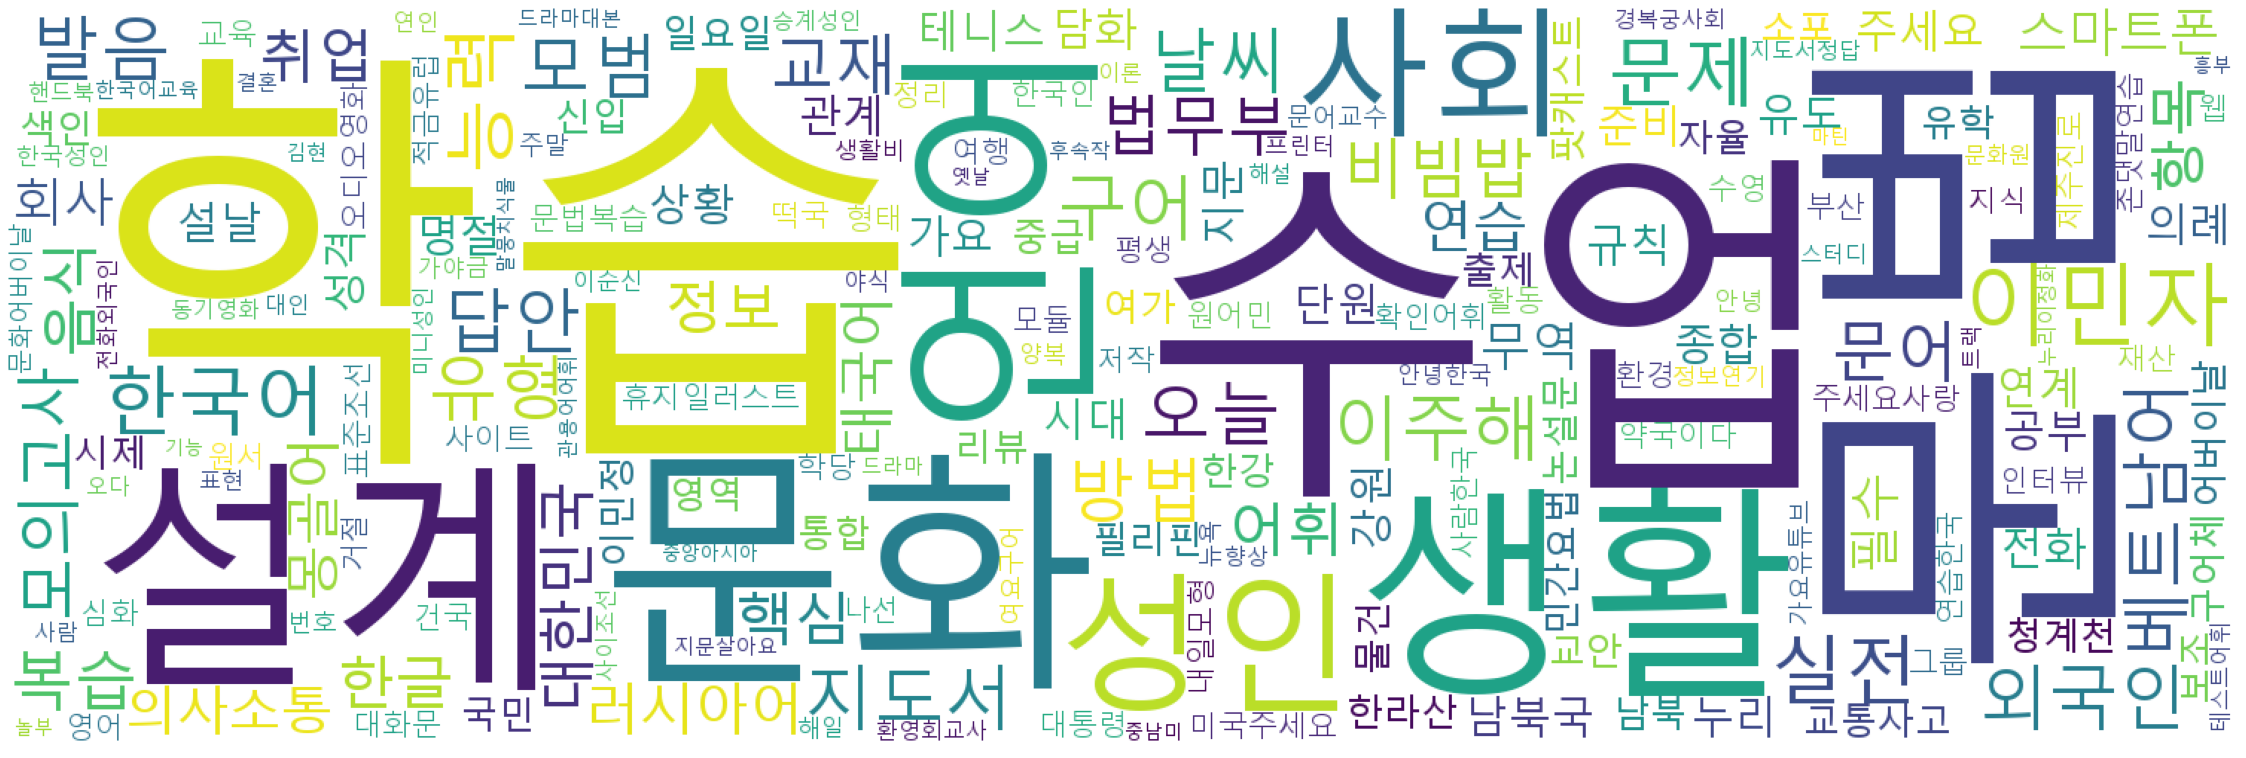

In [23]:
# 워드클라우드를 그려보자
wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',  # 윈도우:'c:/Windows/Fonts/malgun.ttf'
                      relative_scaling = 0.4, 
                      #stopwords=STOPWORDS,
                      background_color='white',
                      width=1500, height=500).generate_from_frequencies(dict(keyword_counter))
plt.figure(figsize=(40,40))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## 전체 리뷰 단어 분석

In [24]:
content_list = gyobo_anal.comment.values.tolist()

In [25]:
# 수집한 글들을 한 문장으로 합치기
content_text = ''

for each_line in content_list[:2000]:
    content_text = content_text + each_line + '\n'

In [26]:
# 형태소 분석기를 통해 명사만 추출하는 함수
def tokenizer_konlpy(text):
    okt=Okt()  
    return [word for word in okt.nouns(text)] 
noun_token = tokenizer_konlpy(content_text)
print(noun_token)

['추천', '바로', '구매', '책', '덕분', '선착순', '초도', '제', '것', '뿐', '것', '책', '레터', '링', '케이크', '상태', '도', '것', '알', '디자인', '알', '수', '요즘', '유행', '케이크', '인기', '케이크', '저', '책', '먼저', '접', '역시', '실력', '책', '정독', '책', '디자인', '얼른', '여러', '디자인', '보고', '생각', '책', '평이', '구매', '활용', '거', '완전', '꼭', '더', '디자인', '누나', '정말', '이', '책', '통해', '만', '전체', '볼', '만해', '책', '디피', '상품', '신건', '환불', '상품', '책', '몇장', '장', '지모', '새', '책', '구매', '디자인', '케이크', '주문', '케이크', '때', '도움', '것', '설명', '제', '수', '제지', '증', '케이크', '관심', '기초', '누', '컬러', '조색', '팁', '등', '독학', '책', '발견', '바로', '구매', '도움', '책', '기초', '케이크', '여러가지', '기초', '장비', '지식', '저', '정말', '재료', '기초', '필요', '장비', '더욱', '폭', '이해', '그림', '떡', '그대', '케이크', '책', '초보자', '정말', '볼', '수', '책', '누', '종류', '별로', '법', '케이크', '데커', '레이', '션', '방법', '보기', '정리', '정말', '인생', '갈림길', '때', '도움', '유투', '버', '지식', '칼', '추천', '소장', '책', '주문', '완료', '주변', '필독', '추천', '삶', '대한', '자세', '새로이', '다시', '또', '감동', '이', '책', '내', '표지', '무엇', '생각', '제', '삶', '표지', '이', '책', '걸', '깨', '마음', 

In [27]:
ko = nltk.Text(noun_token)   
print(len(noun_token))          # 토큰 전체 갯수
print(len(set(noun_token)))     # 토큰 unique 갯수

9882
2009


In [28]:
ko = nltk.Text(noun_token)
ko.vocab().most_common(100)    # 가장 많이 나온 단어 100개

[('책', 694),
 ('마음', 201),
 ('공감', 171),
 ('것', 160),
 ('아이', 137),
 ('수', 129),
 ('생각', 127),
 ('내용', 105),
 ('구매', 101),
 ('추천', 96),
 ('도움', 91),
 ('사람', 86),
 ('이', 80),
 ('때', 74),
 ('위로', 72),
 ('다시', 71),
 ('내', 67),
 ('선물', 67),
 ('대해', 66),
 ('정말', 61),
 ('나', 59),
 ('요', 57),
 ('더', 56),
 ('이해', 55),
 ('구입', 52),
 ('공부', 52),
 ('알', 51),
 ('삶', 51),
 ('기대', 44),
 ('치유', 44),
 ('저', 43),
 ('보고', 43),
 ('글', 43),
 ('독해', 43),
 ('불안', 41),
 ('문제', 40),
 ('대한', 38),
 ('꼭', 37),
 ('그', 37),
 ('말', 36),
 ('작가', 36),
 ('집', 36),
 ('우리', 34),
 ('단계', 34),
 ('한번', 33),
 ('해', 33),
 ('다른', 33),
 ('독해력', 33),
 ('또', 32),
 ('느낌', 31),
 ('힘', 31),
 ('자신', 31),
 ('풀', 31),
 ('위해', 30),
 ('당신', 29),
 ('인생', 28),
 ('감정', 28),
 ('방법', 26),
 ('최고', 26),
 ('시작', 26),
 ('학년', 25),
 ('이야기', 25),
 ('제', 24),
 ('배송', 24),
 ('번', 24),
 ('위', 24),
 ('역시', 23),
 ('시간', 23),
 ('스스로', 23),
 ('관계', 23),
 ('상처', 23),
 ('거', 22),
 ('주변', 22),
 ('조금', 22),
 ('좀', 22),
 ('어휘', 22),
 ('요즘', 21),
 ('통해', 21),


In [29]:
# 불용어 : 인터넷 검색 시 검색 용어로 사용하지 않는 단어. 관사, 전치사, 조사, 접속사 등 검색 색인 단어로 의미가 없는 단어
stop_words = ['.',' ', '\n','\n ', 'nan','소설','대한','보고','정말','대해','책','것','수','이','내','때','나','요','더','알','꼭','그','저','제','번','위','해','다른','또']

noun_token = [each_word for each_word in noun_token
             if each_word not in stop_words]

ko = nltk.Text(noun_token)
ko.vocab().most_common(50)

[('마음', 201),
 ('공감', 171),
 ('아이', 137),
 ('생각', 127),
 ('내용', 105),
 ('구매', 101),
 ('추천', 96),
 ('도움', 91),
 ('사람', 86),
 ('위로', 72),
 ('다시', 71),
 ('선물', 67),
 ('이해', 55),
 ('구입', 52),
 ('공부', 52),
 ('삶', 51),
 ('기대', 44),
 ('치유', 44),
 ('글', 43),
 ('독해', 43),
 ('불안', 41),
 ('문제', 40),
 ('말', 36),
 ('작가', 36),
 ('집', 36),
 ('우리', 34),
 ('단계', 34),
 ('한번', 33),
 ('독해력', 33),
 ('느낌', 31),
 ('힘', 31),
 ('자신', 31),
 ('풀', 31),
 ('위해', 30),
 ('당신', 29),
 ('인생', 28),
 ('감정', 28),
 ('방법', 26),
 ('최고', 26),
 ('시작', 26),
 ('학년', 25),
 ('이야기', 25),
 ('배송', 24),
 ('역시', 23),
 ('시간', 23),
 ('스스로', 23),
 ('관계', 23),
 ('상처', 23),
 ('거', 22),
 ('주변', 22)]

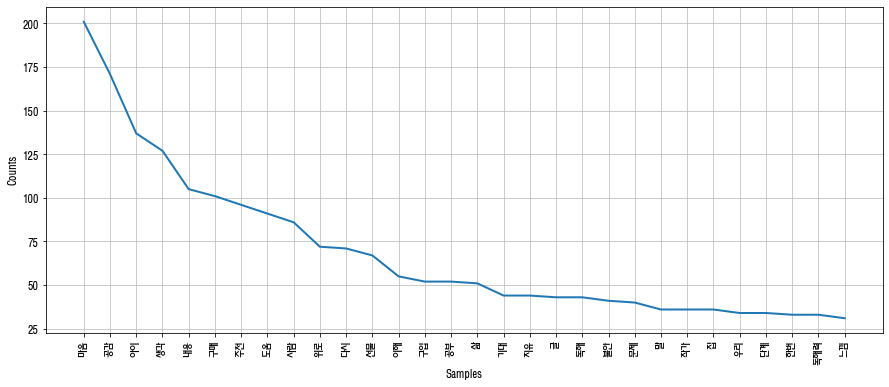

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz             
from sklearn.tree import export_graphviz
plt.figure(figsize=(15,6))
ko.plot(30) 
plt.show()

* 전체 리뷰에서 명사 추출

In [31]:
data = ko.vocab().most_common(300)
data

[('마음', 201),
 ('공감', 171),
 ('아이', 137),
 ('생각', 127),
 ('내용', 105),
 ('구매', 101),
 ('추천', 96),
 ('도움', 91),
 ('사람', 86),
 ('위로', 72),
 ('다시', 71),
 ('선물', 67),
 ('이해', 55),
 ('구입', 52),
 ('공부', 52),
 ('삶', 51),
 ('기대', 44),
 ('치유', 44),
 ('글', 43),
 ('독해', 43),
 ('불안', 41),
 ('문제', 40),
 ('말', 36),
 ('작가', 36),
 ('집', 36),
 ('우리', 34),
 ('단계', 34),
 ('한번', 33),
 ('독해력', 33),
 ('느낌', 31),
 ('힘', 31),
 ('자신', 31),
 ('풀', 31),
 ('위해', 30),
 ('당신', 29),
 ('인생', 28),
 ('감정', 28),
 ('방법', 26),
 ('최고', 26),
 ('시작', 26),
 ('학년', 25),
 ('이야기', 25),
 ('배송', 24),
 ('역시', 23),
 ('시간', 23),
 ('스스로', 23),
 ('관계', 23),
 ('상처', 23),
 ('거', 22),
 ('주변', 22),
 ('조금', 22),
 ('좀', 22),
 ('어휘', 22),
 ('요즘', 21),
 ('통해', 21),
 ('아주', 21),
 ('사랑', 21),
 ('심리학', 21),
 ('주문', 20),
 ('듯', 20),
 ('개', 20),
 ('교재', 20),
 ('설명', 19),
 ('별로', 19),
 ('줄', 19),
 ('권', 19),
 ('부분', 19),
 ('소장', 18),
 ('처음', 18),
 ('지인', 18),
 ('여행', 18),
 ('힐링', 18),
 ('도서', 18),
 ('분', 18),
 ('구성', 18),
 ('지문', 18),
 ('정독', 17),
 (

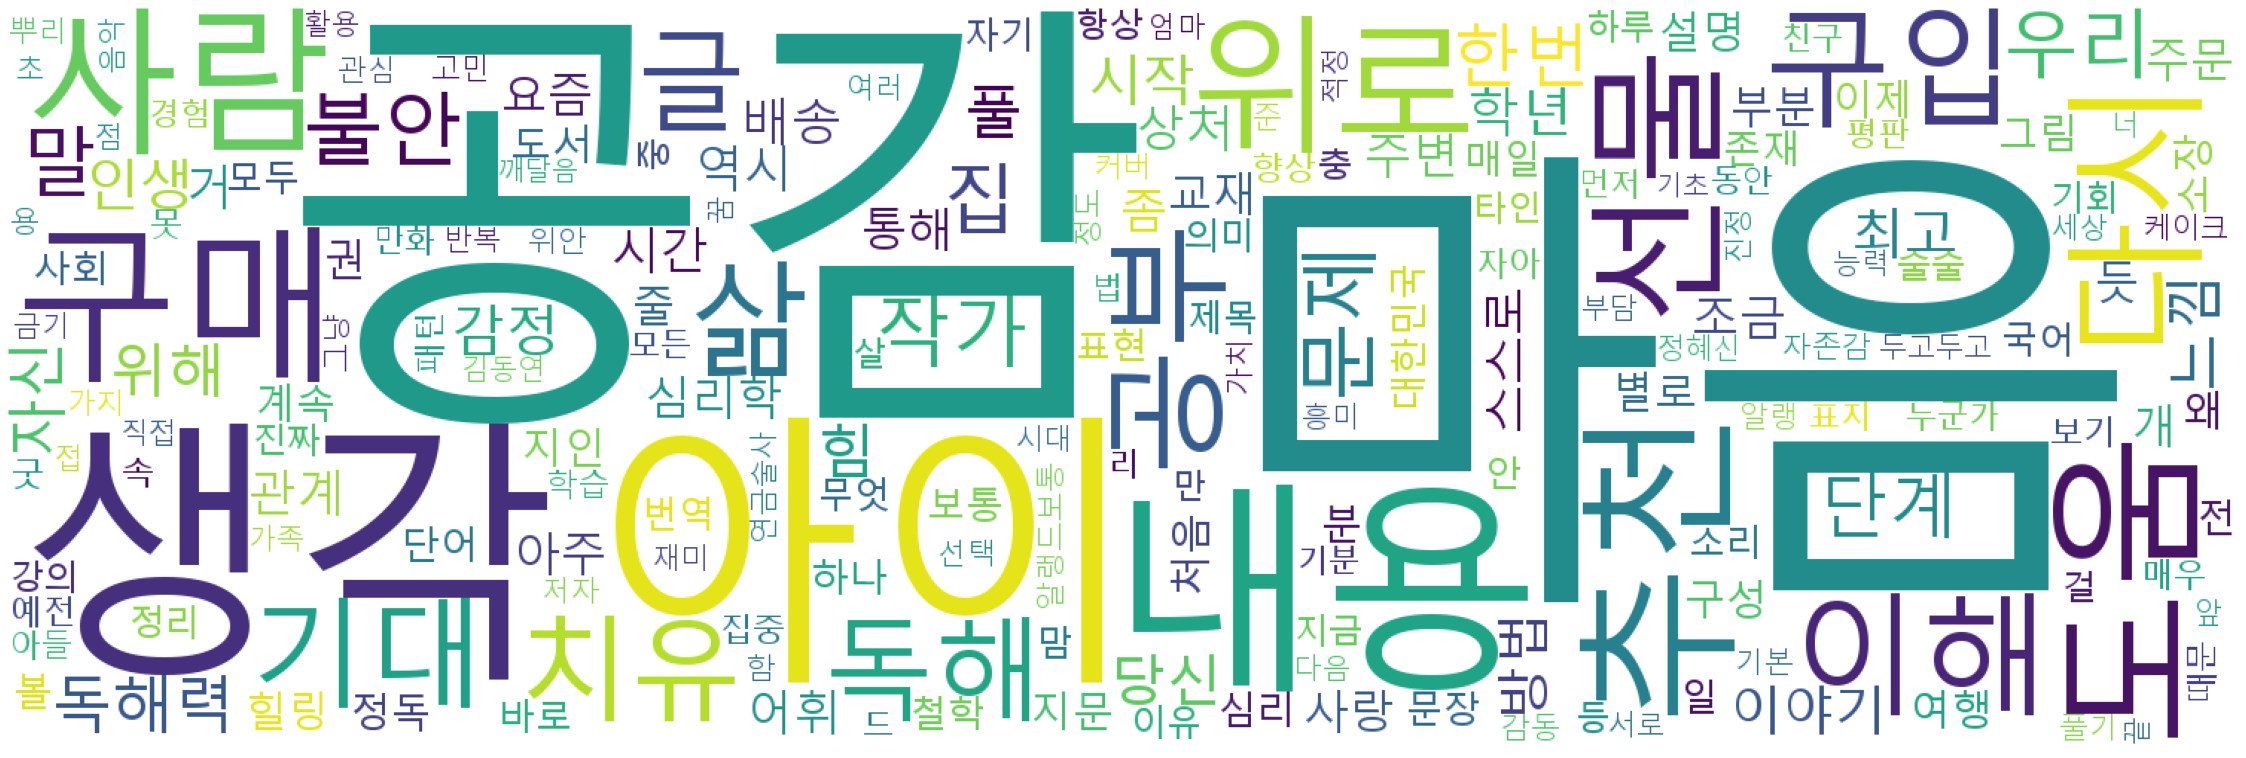

In [32]:
# 리뷰 기반 워드클라우드
wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',  # 윈도우:'c:/Windows/Fonts/malgun.ttf'
                      relative_scaling = 0.4, 
                      #stopwords=STOPWORDS,
                      background_color='white',
                      width=1500, height=500).generate_from_frequencies(dict(data))
plt.figure(figsize=(40,40))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()